### Anomalies Detection on Health Insurance Claims

1. Exploratory Data Analysis
    + Features knowledge

EDA driven on Sinister dataset, followed over some assumptions

### Análisis de Conexiones

In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tools.plotting import scatter_matrix
mpl.style.use('ggplot')
%matplotlib inline

En base a los actores y participantes en un siniestro se construyen sus relaciones en un meta grafo, cabe mencionar que se trata de un grafo dirigido finito, en el que se observan 7 tipos de nodos y 3 tipos de relaciones

![](meta-graph.png)

In [2]:
!pwd

/c/Users/A2276061/Documents/GMM


In [59]:
df_grados = pd.read_csv("grados-grafo.csv", parse_dates=True, encoding="latin1")

In [60]:
df_nodos = pd.read_csv("nodes-relations.csv", parse_dates=True, encoding="latin1")

    //Grados Totales del Grafo
    MATCH (n)-[r]-()
    RETURN n.Name, count(distinct r) as Degree
    ORDER BY Degree DESC

In [56]:
print(df_grados.head(30))

                                         n.Name  Degree
0       UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO     391
1                  GOBIERNO DEL EDO. DE JALISCO     280
2                                  IHO890607N67     116
3                     ASTRAZENECA, S.A. DE C.V.      69
4                                 HCO730301UB7B      68
5                                 HCO730301UB7A      65
6                                  AMS0310307G0      61
7   ASOCIACION EDUCACIONAL MEXICO CENTRAL, A.C.      59
8               COLEGIO CERVANTES PRIMARIA A.C.      55
9                                 FAGA760725EC7      55
10                                        SABES      48
11                                 HCO000119IS6      48
12                                 MSU820125T58      48
13                                 OHM060822EG1      48
14                                IAML6108233Q0      43
15                                 CSA030923LB3      41
16                 ABC AEROLINEAS, S.A. DE C.V. 

In [63]:
df_grados['Degree'].count()

4941

Conocer el grado de las conexiones nos ayuda a conocer el "peso" en las relaciones que tienen los distintos actores en un siniestro. 

Adicionalmente a esto se observó anteriormente los casos atípicos que se deben considerar con una etiqueta distinta o un dataset diferente, con la finalidad de que si tenemos un actor en el tiempo y tiene mayor grado que el esperado entonces es un punto de observación

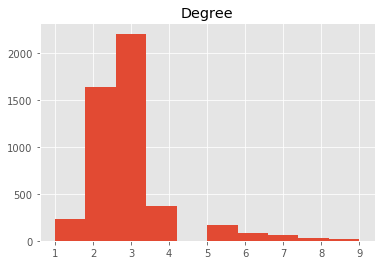

In [67]:
plt.figure()
df_grados[df_grados['Degree']<10].hist(bins=10)
plt.show()

In [70]:
df_grados['Degree'].mean()

3.5019226877150373

### Grafo 7 tipos de nodo 2 tipos de relaciones

![](graph-all-3k.png) [Todos los Nodos](graph-all-3k.png)

Después de tener un panorama general de las comunidades influyentes en el grafo, se observa que la inercia va dirigida a los hospitales y las oficinas, por lo que se analizará por separado la relación "work" para tener una idea de como los agentes se relacinan con los prestadores de servicios

    MATCH p=()-[r:Work]->() RETURN p

### Grafo 4 tipos de nodo 1 tipo de relacion

![](graph-place-ralation.png)  [Nodos tipo lugar](graph-place-ralation.png)

Hay una mejor visualización de comunidades y su influencia en el peso del grafo

In [54]:
hosp1=df_nodos[df_nodos['HOSP_ID'] =='IHO890607N67']
hosp1[['HOSP_NAME','OFFICE_NAME','POLICY_NAME']].groupby(['HOSP_NAME','OFFICE_NAME','POLICY_NAME']).count()

Empty DataFrame
Columns: []
Index: [(CENTRO MEDICO DALINDE, AARCO AGENTE DE SEGUROS Y DE FIANZAS SA DE CV     , CH2M HILL, S.A. DE C.V.), (CENTRO MEDICO DALINDE, ANDREA CORONA ESPINOZA                            , A.C.J. DE LA CIUDAD DE MEXICO YMCA, A.C.), (CENTRO MEDICO DALINDE, AON MEXICO LINEAS PERSONALES BANORTE JALISCO      , ASTRAZENECA, S.A. DE C.V.), (CENTRO MEDICO DALINDE, AON MEXICO LINEAS PERSONALES BANORTE MEXICO       , ASTRAZENECA, S.A. DE C.V.), (CENTRO MEDICO DALINDE, AON MEXICO LINEAS PERSONALES BANORTE RESTO DE LA R, ASTRAZENECA, S.A. DE C.V.), (CENTRO MEDICO DALINDE, ARMANDO ILESCA MIGUEL                             , A.C.J. DE LA CIUDAD DE MEXICO YMCA, A.C.), (CENTRO MEDICO DALINDE, ASOC EDUCACIONAL MEXICO CENTRAL AC CVE4576        , ASOCIACION EDUCACIONAL MEXICO CENTRAL, A.C.), (CENTRO MEDICO DALINDE, BITUAJ (MERCADOS MASIVOS)                         , ABC AEROLINEAS, S.A. DE C.V.), (CENTRO MEDICO DALINDE, BITUAJ (MERCADOS MASIVOS)                         , SERVICIOS ADMINISTRATIVOS VOLARIS, S.A. DE C.V.), (CENTRO MEDICO DALINDE, BITUAJ AGENTE DE SEGUROS Y DE FIANZAS SA          , ABC AEROLINEAS, S.A. DE C.V.), (CENTRO MEDICO DALINDE, BITUAJ AGENTE DE SEGUROS Y DE FIANZAS SA          , SERVICIOS ADMINISTRATIVOS VOLARIS, S.A. DE C.V.), (CENTRO MEDICO DALINDE, CANCUN                                            , CH2M HILL, S.A. DE C.V.), (CENTRO MEDICO DALINDE, CFE                                               , UNIVERSIDAD AUTONOMA METROPOLITANA), (CENTRO MEDICO DALINDE, CFE                                               , UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO), (CENTRO MEDICO DALINDE, CHIHUAHUA                                         , CH2M HILL, S.A. DE C.V.), (CENTRO MEDICO DALINDE, CLAUDIA LIMON GONZALEZ                            , A.C.J. DE LA CIUDAD DE MEXICO YMCA, A.C.), (CENTRO MEDICO DALINDE, CLICK SEGUROS (CVE2742) CARGA MASIVA              , ABC AEROLINEAS, S.A. DE C.V.), (CENTRO MEDICO DALINDE, CLICK SEGUROS (CVE2742) CARGA MASIVA              , SERVICIOS ADMINISTRATIVOS VOLARIS, S.A. DE C.V.), (CENTRO MEDICO DALINDE, CLICK SEGUROS 1 (CVE2742)                         , ABC AEROLINEAS, S.A. DE C.V.), (CENTRO MEDICO DALINDE, CLICK SEGUROS 1 (CVE2742)                         , SERVICIOS ADMINISTRATIVOS VOLARIS, S.A. DE C.V.), (CENTRO MEDICO DALINDE, CLICK SEGUROS 2 (CVE2742)                         , ABC AEROLINEAS, S.A. DE C.V.), (CENTRO MEDICO DALINDE, CLICK SEGUROS 2 (CVE2742)                         , SERVICIOS ADMINISTRATIVOS VOLARIS, S.A. DE C.V.), (CENTRO MEDICO DALINDE, CORCAM EMPLEADOS (CVE4792)                        , SIEMENS ENTERPRISE COMMUNICATIONS SERVICIOS, S.A DE C.V), (CENTRO MEDICO DALINDE, CORCAM EMPLEADOS (CVE4792)                        , SONY COMERCIO DE MEXICO, S.A. DE C.V.), (CENTRO MEDICO DALINDE, DANIEL ANTONIO NUNEZ RUBIO                        , A.C.J. DE LA CIUDAD DE MEXICO YMCA, A.C.), (CENTRO MEDICO DALINDE, FLOTILLA EMPLEADOS CARVAJAL (CVE4792)             , SIEMENS ENTERPRISE COMMUNICATIONS SERVICIOS, S.A DE C.V), (CENTRO MEDICO DALINDE, FLOTILLA EMPLEADOS CARVAJAL (CVE4792)             , SONY COMERCIO DE MEXICO, S.A. DE C.V.), (CENTRO MEDICO DALINDE, FLOTILLA EMPLEADOS HENKEL MEXICANA                , SIEMENS ENTERPRISE COMMUNICATIONS SERVICIOS, S.A DE C.V), (CENTRO MEDICO DALINDE, FLOTILLA EMPLEADOS HENKEL MEXICANA                , SONY COMERCIO DE MEXICO, S.A. DE C.V.), (CENTRO MEDICO DALINDE, FLOTILLA EMPLEADOS PROYECTO MAQUILAS (CVE4792)    , SIEMENS ENTERPRISE COMMUNICATIONS SERVICIOS, S.A DE C.V), (CENTRO MEDICO DALINDE, FLOTILLA EMPLEADOS PROYECTO MAQUILAS (CVE4792)    , SONY COMERCIO DE MEXICO, S.A. DE C.V.), (CENTRO MEDICO DALINDE, FLOTILLA EMPLEADOS UNIFY COMUNICATIONS            , SIEMENS ENTERPRISE COMMUNICATIONS SERVICIOS, S.A DE C.V), (CENTRO MEDICO DALINDE, FLOTILLA EMPLEADOS UNIFY COMUNICATIONS            , SONY COMERCIO DE MEXICO, S.A. DE C.V.), (CENTRO MEDICO DALINDE, FRANCISCO JONATHAN MARTINEZ                       , A.C.J. DE LA CIUDAD DE MEX

In [75]:
hosp2=df_nodos[df_nodos['HOSP_ID'] =='AMS0310307G0']
hosp2[['HOSP_NAME','OFFICE_NAME','POLICY_NAME']].groupby(['HOSP_NAME','OFFICE_NAME','POLICY_NAME']).count()

Empty DataFrame
Columns: []
Index: [(ASISTENCIA MEDICA SM SINERGIA SC, AON MEXICO LINEAS PERSONALES BANORTE JALISCO      , ASTRAZENECA, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, AON MEXICO LINEAS PERSONALES BANORTE JALISCO      , PHILIPS LIGHTING ELECTROMAGNETICS S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, AON MEXICO LINEAS PERSONALES BANORTE MEXICO       , ASTRAZENECA, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, AON MEXICO LINEAS PERSONALES BANORTE MEXICO       , PHILIPS LIGHTING ELECTROMAGNETICS S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, AON MEXICO LINEAS PERSONALES BANORTE RESTO DE LA R, ASTRAZENECA, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, AON MEXICO LINEAS PERSONALES BANORTE RESTO DE LA R, PHILIPS LIGHTING ELECTROMAGNETICS S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, BITUAJ (MERCADOS MASIVOS)                         , ABC AEROLINEAS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, BITUAJ (MERCADOS MASIVOS)                         , SERVICIOS ADMINISTRATIVOS VOLARIS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, BITUAJ AGENTE DE SEGUROS Y DE FIANZAS SA          , ABC AEROLINEAS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, BITUAJ AGENTE DE SEGUROS Y DE FIANZAS SA          , SERVICIOS ADMINISTRATIVOS VOLARIS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, CERRITO AUTOS                                     , COLEGIO DE INGENIEROS CIVILES DEL ESTADO DE MEXICO,A.C.), (ASISTENCIA MEDICA SM SINERGIA SC, CERRITO VIGENCIA MENSUAL                          , COLEGIO DE INGENIEROS CIVILES DEL ESTADO DE MEXICO,A.C.), (ASISTENCIA MEDICA SM SINERGIA SC, CFE                                               , UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO), (ASISTENCIA MEDICA SM SINERGIA SC, CFE WYL ROMO RODRIGUEZ                            , HERRERA LOPEZ FRANCISCO VENTURA), (ASISTENCIA MEDICA SM SINERGIA SC, CHG CONSULTORES SC                                , GOBIERNO DEL ESTADO DE JALISCO / DESCUENTO POR NOMINA), (ASISTENCIA MEDICA SM SINERGIA SC, CLAVE DIRECTA AGUASCALIENTES                      , CALSONIC KANSEI MEXICANA S.A DE C.V), (ASISTENCIA MEDICA SM SINERGIA SC, CLICK SEGUROS (CVE2742) CARGA MASIVA              , ABC AEROLINEAS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, CLICK SEGUROS (CVE2742) CARGA MASIVA              , SERVICIOS ADMINISTRATIVOS VOLARIS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, CLICK SEGUROS 1 (CVE2742)                         , ABC AEROLINEAS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, CLICK SEGUROS 1 (CVE2742)                         , SERVICIOS ADMINISTRATIVOS VOLARIS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, CLICK SEGUROS 2 (CVE2742)                         , ABC AEROLINEAS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, CLICK SEGUROS 2 (CVE2742)                         , SERVICIOS ADMINISTRATIVOS VOLARIS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, DXN EMPLEADOS DE GOBIERNO DEL EDO DE JALISCO      , GOBIERNO DEL ESTADO DE JALISCO / DESCUENTO POR NOMINA), (ASISTENCIA MEDICA SM SINERGIA SC, FAMILIARES DE EMPLEADOS DEL GOBIERNO DEL EDO JALIS, GOBIERNO DEL ESTADO DE JALISCO / DESCUENTO POR NOMINA), (ASISTENCIA MEDICA SM SINERGIA SC, FRIEDICH WILHELM RANSOM BECKER                    , STRATTEC DE MEXICO, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, GRUFESA (GRUPO FARMACOS ESPECIALIZADOS SA DE CV)  , ADM SERVICIOS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, GUSTAVO MEDINA REYNAGA                            , YOROZU MEXICANA, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, INTERPROTECCION AGENTE D SEGUROS Y D F            , ADM SERVICIOS, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, MCGRAW HILL INTERAMERICANA EDITORES SA DE CV      , ASTRAZENECA, S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, MCGRAW HILL INTERAMERICANA EDITORES SA DE CV      , PHILIPS LIGHTING ELECTROMAGNETICS S.A. DE C.V.), (ASISTENCIA MEDICA SM SINERGIA SC, PEDRO HECTOR QUIMBAR DOMINGUEZ                    , COLEGIO DE INGENIEROS CIVILES

In [76]:
hosp2=df_nodos[df_nodos['HOSP_ID'] =='HCO730301UB7B']
hosp2[['HOSP_NAME','OFFICE_NAME','POLICY_NAME']].groupby(['HOSP_NAME','OFFICE_NAME','POLICY_NAME']).count()

Empty DataFrame
Columns: []
Index: [(HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , BOTANAS Y DERIVADOS, S.A DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , CONTROL LOCURA, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , HOME INTERIORS SERVICES DE MEXICO, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , PROLEC GE INDUSTRIAS, S.A DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , SEMLAB, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , SERVICIOS CORPORATIVOS CONTROL, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , SERVICIOS CORPORATIVOS INGENIOS SANTOS S DE RL DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , SERVICIOS EJECUTIVOS DE TIENDA, S.A. DE  C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , SERVICIOS VALLE DEL CAMPESTRE, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , SOPORTE MAXIMO, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , VIAKABLE OPERACIONES, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ALTERNATIVAS EN RIESGOS AGENTE DE SEGUROS         , XIGNUX CORPORATIVO, S.A DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., AON MEXICO LINEAS PERSONALES BANORTE JALISCO      , PHILIPS LUMINARIAS DE MEXICO, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., AON MEXICO LINEAS PERSONALES BANORTE MEXICO       , PHILIPS LUMINARIAS DE MEXICO, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., AON MEXICO LINEAS PERSONALES BANORTE RESTO DE LA R, PHILIPS LUMINARIAS DE MEXICO, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , BOTANAS Y DERIVADOS, S.A DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , CONTROL LOCURA, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , HOME INTERIORS SERVICES DE MEXICO, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , PROLEC GE INDUSTRIAS, S.A DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , SEMLAB, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , SERVICIOS CORPORATIVOS CONTROL, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , SERVICIOS CORPORATIVOS INGENIOS SANTOS S DE RL DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , SERVICIOS EJECUTIVOS DE TIENDA, S.A. DE  C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , SERVICIOS VALLE DEL CAMPESTRE, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , SOPORTE MAXIMO, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , VIAKABLE OPERACIONES, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV (CVE7205)CMA      , XIGNUX CORPORATIVO, S.A DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV VC10              , BOTANAS Y DERIVADOS, S.A DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV VC10              , CONTROL LOCURA, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA DE CV VC10              , HOME INTERIORS SERVICES DE MEXICO, S.A. DE C.V.), (HOSPITAL Y CLINICA OCA S.A. DE C.V., ARRENDADORA DATA MOVIL SA

In [77]:
hosp3=df_nodos[df_nodos['HOSP_ID'] =='MED071211LQ2']
hosp3[['HOSP_NAME','OFFICE_NAME','POLICY_NAME']].groupby(['HOSP_NAME','OFFICE_NAME','POLICY_NAME']).count()

Empty DataFrame
Columns: []
Index: [(MEDYARTHROS SA DE CV, CHG CONSULTORES SC                                , GOBIERNO DEL EDO. DE JALISCO), (MEDYARTHROS SA DE CV, CHG CONSULTORES SC                                , GOBIERNO DEL ESTADO DE JALISCO), (MEDYARTHROS SA DE CV, DXN EMPLEADOS DE GOBIERNO DEL EDO DE JALISCO      , GOBIERNO DEL EDO. DE JALISCO), (MEDYARTHROS SA DE CV, DXN EMPLEADOS DE GOBIERNO DEL EDO DE JALISCO      , GOBIERNO DEL ESTADO DE JALISCO), (MEDYARTHROS SA DE CV, FAMILIARES DE EMPLEADOS DEL GOBIERNO DEL EDO JALIS, GOBIERNO DEL EDO. DE JALISCO), (MEDYARTHROS SA DE CV, FAMILIARES DE EMPLEADOS DEL GOBIERNO DEL EDO JALIS, GOBIERNO DEL ESTADO DE JALISCO), (MEDYARTHROS SA DE CV, OML AGENTE DE SEGUROS S.A DE C.V.                 , OML AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V.), (MEDYARTHROS SA DE CV, OML AGENTE DE SEGUROS S.A DE C.V.                 , OMNIHUMANA, S.A. DE C.V.), (MEDYARTHROS SA DE CV, OML EMPLEADOS (CVE 1442)                          , OML AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V.), (MEDYARTHROS SA DE CV, OML EMPLEADOS (CVE 1442)                          , OMNIHUMANA, S.A. DE C.V.), (MEDYARTHROS SA DE CV, OMNILIFE DE MEXICO (CVE1442)                      , OML AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V.), (MEDYARTHROS SA DE CV, OMNILIFE DE MEXICO (CVE1442)                      , OMNIHUMANA, S.A. DE C.V.), (MEDYARTHROS SA DE CV, OMNILIFE DXN (CVE 1442 CMAS)                      , OML AGENTE DE SEGUROS Y DE FIANZAS S.A DE C.V.), (MEDYARTHROS SA DE CV, OMNILIFE DXN (CVE 1442 CMAS)                      , OMNIHUMANA, S.A. DE C.V.)]